In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/train.csv')
df_cleaned = df.dropna()
df_cleaned

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
def update_df(dataframe): 
    df = dataframe.copy()

    df.loc[:, 'FirstName'] = df.loc[:, 'Name'].apply(lambda x: x.split()[0])
    df.loc[:, 'LastName'] = df.loc[:, 'Name'].apply(lambda x: x.split()[1])

    df.loc[:, 'PassengerGGGG'] = df.loc[:, 'PassengerId'].apply(lambda x: int(x.split('_')[0]))
    df.loc[:, 'PassengerPP'] = df.loc[:, 'PassengerId'].apply(lambda x: int(x.split('_')[1]))

    df['cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if x != 'Unknown' else 'U')
    df['cabin_num'] = df['Cabin'].apply(lambda x: int(x.split('/')[1]) if x != 'Unknown' else -1)
    df['cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if x != 'Unknown' else 'U')

    df.loc[:, 'Spent'] = df.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    df.drop(['Cabin', 'Name', 'PassengerId'], inplace=True, axis=1)

    return df

In [4]:
df_updated = update_df(df_cleaned)
df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,PassengerGGGG,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,1,1,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,2,1,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,3,1,A,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,3,2,A,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,4,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Gravior,Noxnuther,9276,1,A,98,P,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Kurta,Mondalley,9278,1,G,1499,S,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Fayey,Connon,9279,1,G,1500,S,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Celeon,Hontichre,9280,1,E,608,S,4637.0


In [5]:
df_updated.loc[:, ['LastName', 'Transported']].groupby('LastName').mean().sort_values('Transported').describe()

,Transported
count,2112.000000
mean,0.518837
std,0.358717
min,0.000000
25%,0.250000
50%,0.500000
75%,0.833333
max,1.000000


<Axes: xlabel='LastName'>

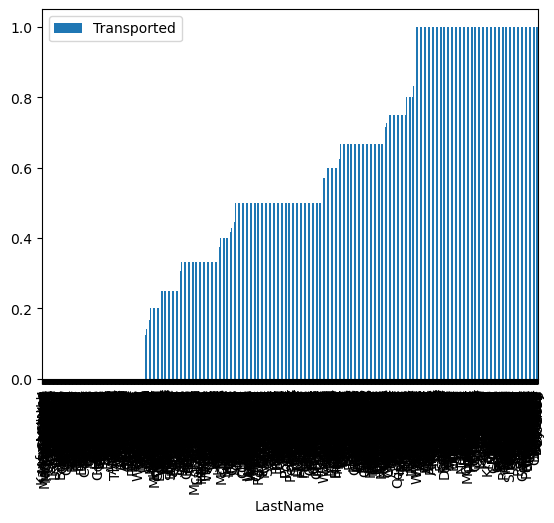

In [6]:
df_updated.loc[:, ['LastName', 'Transported']].groupby('LastName').mean().sort_values('Transported').plot.bar()

In [7]:
mask = df_updated.groupby('LastName')['Transported'].mean() >= 0.5
mask

LastName
Acobson        False
Acobsond        True
Adavisons      False
Adkinson       False
Admingried      True
               ...  
Wynneyerson     True
Yanton         False
Yatters         True
Yorkland        True
Youngrayes      True
Name: Transported, Length: 2112, dtype: bool

In [8]:
lastname_have_impact = mask[mask].index.tolist()
len(lastname_have_impact)

1288

<Axes: xlabel='FirstName'>

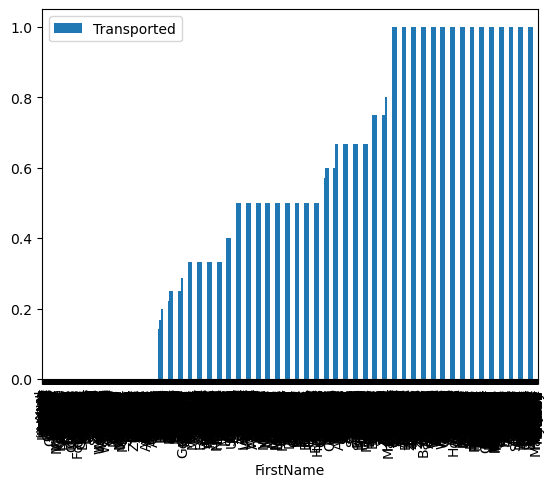

In [9]:
df_updated.loc[:, ['FirstName', 'Transported']].groupby('FirstName').mean().sort_values('Transported').plot.bar()

In [10]:
mask = df_updated.groupby('FirstName')['Transported'].mean() >= 0.5
mask

FirstName
Aard       False
Aarjel     False
Aark        True
Aarone      True
Aars        True
           ...  
Zinor      False
Zinoth     False
Zosmark     True
Zosmas      True
Zubeneb    False
Name: Transported, Length: 2531, dtype: bool

In [11]:
firstname_have_impact = mask[mask].index.tolist()
len(firstname_have_impact)

1545

In [12]:
df_updated.loc[:, 'FirstNameHaveImpact'] = df_updated.loc[:, 'FirstName'].apply(lambda x: 1 if x in firstname_have_impact else 0)
df_updated.loc[:, 'LastNameHaveImpact'] = df_updated.loc[:, 'LastName'].apply(lambda x: 1 if x in lastname_have_impact else 0)

df_updated.drop(['FirstName', 'LastName'], inplace=True, axis=1)
df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGGGG,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent,FirstNameHaveImpact,LastNameHaveImpact
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0,P,0.0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,F,0,S,736.0,1,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,A,0,S,10383.0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,0,S,5176.0,1,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,F,1,S,1091.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,1,A,98,P,8536.0,0,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,1,G,1499,S,0.0,0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,1,G,1500,S,1873.0,1,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,1,E,608,S,4637.0,1,1


<Axes: xlabel='PassengerGGGG'>

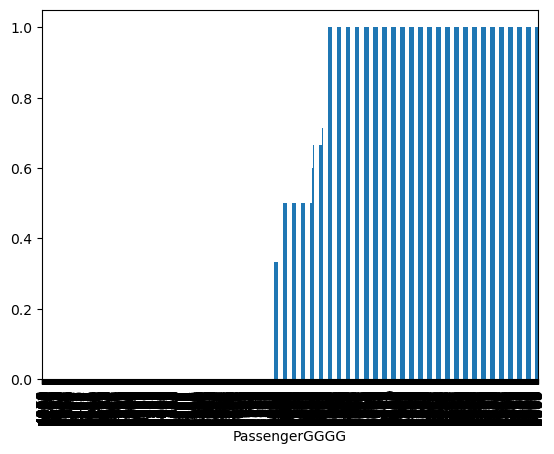

In [19]:
df_updated.groupby('PassengerGGGG')['Transported'].mean().sort_values().plot.bar()

In [20]:
mask = df_updated.groupby('PassengerGGGG')['Transported'].mean() >= 0.5
mask

PassengerGGGG
1       False
2        True
3       False
4        True
5        True
        ...  
9275     True
9276    False
9278    False
9279     True
9280     True
Name: Transported, Length: 5015, dtype: bool

In [21]:
passenger_gggg_have_impact = mask[mask].index.tolist()
len(passenger_gggg_have_impact)

2592

In [26]:
df_updated.loc[:, 'PassengerGGGGHaveImpact'] = df_updated.loc[:, 'PassengerGGGG'].apply(lambda x: 1 if x in passenger_gggg_have_impact else 0)
df_updated.drop('PassengerGGGG', axis=1, inplace=True)
df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent,FirstNameHaveImpact,LastNameHaveImpact,PassengerGGGGHaveImpact
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P,0.0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,F,0,S,736.0,1,1,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,A,0,S,10383.0,0,1,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,A,0,S,5176.0,1,1,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,F,1,S,1091.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,A,98,P,8536.0,0,1,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1,G,1499,S,0.0,0,0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1,G,1500,S,1873.0,1,1,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,E,608,S,4637.0,1,1,1


In [35]:
df_encoded = pd.get_dummies(df_updated, dtype=int, drop_first=True)
df_encoded

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerPP,cabin_num,Spent,...,Destination_TRAPPIST-1e,VIP_True,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,736.0,...,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,10383.0,...,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,2,0,5176.0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,1091.0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,1,98,8536.0,...,0,1,0,0,0,0,0,0,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,1,1499,0.0,...,0,0,0,0,0,0,0,1,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1,1500,1873.0,...,1,0,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,1,608,4637.0,...,0,0,0,0,0,1,0,0,0,1


In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   Transported                6606 non-null   bool   
 7   PassengerPP                6606 non-null   int64  
 8   cabin_num                  6606 non-null   int64  
 9   Spent                      6606 non-null   float64
 10  FirstNameHaveImpact        6606 non-null   int64  
 11  LastNameHaveImpact         6606 non-null   int64  
 12  PassengerGGGGHaveImpact    6606 non-null   int64  
 13  HomePlanet_Europa          6606 non-null   int64  
 1

<Axes: >

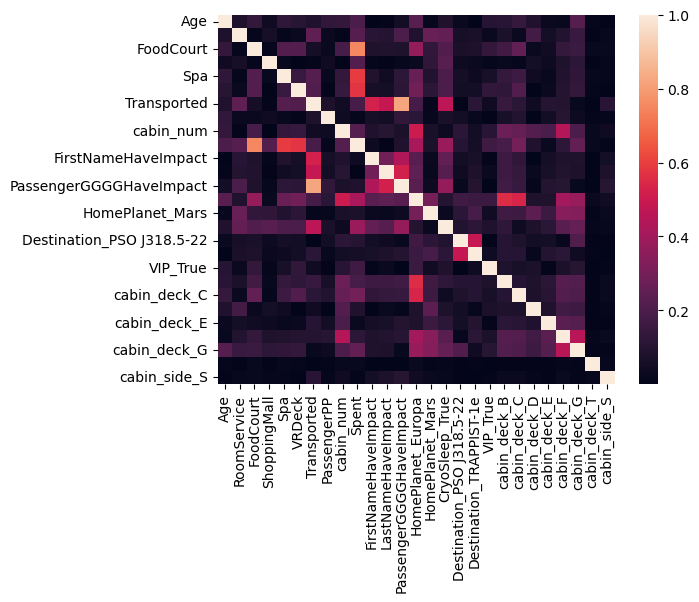

In [43]:
import seaborn as sns


sns.heatmap(df_encoded.corr().abs())

<Axes: >

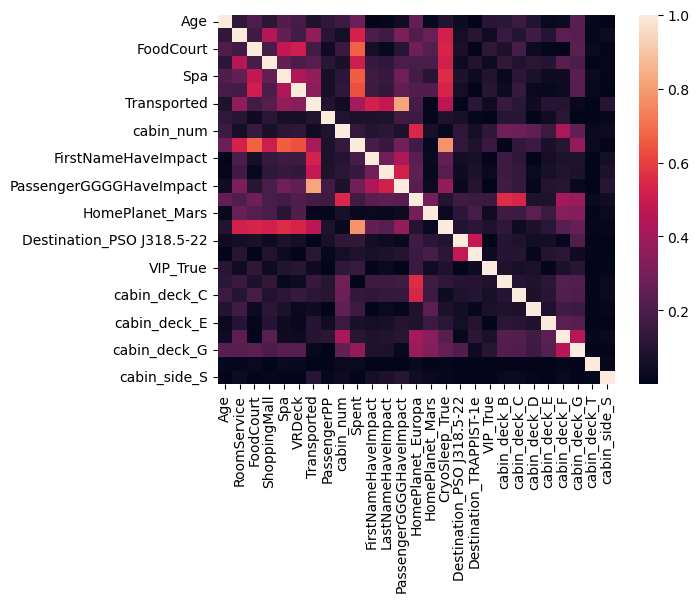

In [46]:
import seaborn as sns


sns.heatmap(df_encoded.corr('spearman').abs())

In [50]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop('Transported', axis=1)
y = df_encoded.loc[:, 'Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2658, number of negative: 2626
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 5284, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503028 -> initscore=0.012112
[LightGBM] [Info] Start training from score 0.012112


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.95,0.95,0.95,0.95,0.21
LogisticRegression,0.95,0.95,0.95,0.95,0.01
LGBMClassifier,0.95,0.95,0.95,0.95,0.09
RandomForestClassifier,0.95,0.95,0.95,0.95,0.37
ExtraTreesClassifier,0.95,0.95,0.95,0.95,0.25
LinearSVC,0.95,0.95,0.95,0.95,0.02
XGBClassifier,0.94,0.94,0.94,0.94,0.20
CalibratedClassifierCV,0.94,0.94,0.94,0.94,0.06
AdaBoostClassifier,0.94,0.94,0.94,0.94,0.18


In [56]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

# Define scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'  # Only valid for binary classification
}

# Define stratified k-fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with multiple scoring metrics
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid={
        'C': [0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 7, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    scoring=scoring,
    refit='f1',  # This metric will be used to refit the best model
    cv=kfold,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Output results
print("Best Parameters (based on F1):", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters (based on F1): {'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.9403122567654121


In [57]:
from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       653
        True       0.93      0.96      0.95       669

    accuracy                           0.94      1322
   macro avg       0.95      0.94      0.94      1322
weighted avg       0.95      0.94      0.94      1322



In [62]:
from sklearn.svm import SVC

best_model = SVC(C=0.05, gamma='scale', kernel='linear')

In [63]:
full_df = df.copy()
full_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False


In [65]:
from sklearn.impute import SimpleImputer

name_cat_imputer = SimpleImputer(strategy='constant', fill_value='Unkown Unkown')
name_imputed = name_cat_imputer.fit_transform(full_df.loc[:, 'Name'].to_frame())
name_imputed

array([['Maham Ofracculy'],
       ['Juanna Vines'],
       ['Altark Susent'],
       ...,
       ['Fayey Connon'],
       ['Celeon Hontichre'],
       ['Propsh Hontichre']], dtype=object)

In [66]:
full_df.loc[:, 'Name'] = name_imputed
full_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False


In [67]:
def update_df(dataframe): 
    df = dataframe.copy()

    df.loc[:, 'FirstName'] = df.loc[:, 'Name'].apply(lambda x: x.split()[0])
    df.loc[:, 'LastName'] = df.loc[:, 'Name'].apply(lambda x: x.split()[1])

    df.loc[:, 'PassengerGGGG'] = df.loc[:, 'PassengerId'].apply(lambda x: int(x.split('_')[0]))
    df.loc[:, 'PassengerPP'] = df.loc[:, 'PassengerId'].apply(lambda x: int(x.split('_')[1]))

    df['cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if x != 'Unknown' else 'U')
    df['cabin_num'] = df['Cabin'].apply(lambda x: int(x.split('/')[1]) if x != 'Unknown' else -1)
    df['cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if x != 'Unknown' else 'U')

    df.loc[:, 'Spent'] = df.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    df.drop(['Cabin', 'Name', 'PassengerId'], inplace=True, axis=1)

    return df

In [68]:
from sklearn.impute import SimpleImputer

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
num_imputer = SimpleImputer(strategy='median')

full_df[num_cols] = num_imputer.fit_transform(full_df[num_cols])

In [69]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

full_df[cat_cols] = cat_imputer.fit_transform(full_df[cat_cols])

In [70]:
full_df_updated = update_df(full_df)
full_df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,PassengerGGGG,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent
0,Europa,False,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False,Maham,Ofracculy,1,1,B,0,P,0.00
1,Earth,False,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True,Juanna,Vines,2,1,F,0,S,736.00
2,Europa,False,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,Altark,Susent,3,1,A,0,S,10383.00
3,Europa,False,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,Solam,Susent,3,2,A,0,S,5176.00
4,Earth,False,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True,Willy,Santantines,4,1,F,1,S,1091.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,False,Gravior,Noxnuther,9276,1,A,98,P,8536.00
8689,Earth,True,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,False,Kurta,Mondalley,9278,1,G,1499,S,0.00
8690,Earth,False,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,True,Fayey,Connon,9279,1,G,1500,S,1873.00
8691,Europa,False,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,False,Celeon,Hontichre,9280,1,E,608,S,4637.00


In [71]:
mask = full_df_updated.groupby('LastName')['Transported'].mean() >= 0.5
mask

LastName
Acobson        False
Acobsond       False
Adavisons      False
Adkinson       False
Admingried      True
               ...  
Wynneyerson     True
Yanton         False
Yatters         True
Yorkland        True
Youngrayes     False
Name: Transported, Length: 2218, dtype: bool

In [72]:
lastname_have_impact = mask[mask].index.tolist()
len(lastname_have_impact)

1334

In [75]:
mask = full_df_updated.groupby('FirstName')['Transported'].mean() >= 0.5
mask

FirstName
Aard       False
Aarjel     False
Aark        True
Aarone      True
Aars        True
           ...  
Zinor      False
Zinoth     False
Zosmark     True
Zosmas      True
Zubeneb     True
Name: Transported, Length: 2707, dtype: bool

In [76]:
full_df_updated.loc[:, 'FirstNameHaveImpact'] = full_df_updated.loc[:, 'FirstName'].apply(lambda x: 1 if x in firstname_have_impact else 0)
full_df_updated.loc[:, 'LastNameHaveImpact'] = full_df_updated.loc[:, 'LastName'].apply(lambda x: 1 if x in lastname_have_impact else 0)

full_df_updated.drop(['FirstName', 'LastName'], inplace=True, axis=1)
full_df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGGGG,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent,FirstNameHaveImpact,LastNameHaveImpact
0,Europa,False,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False,1,1,B,0,P,0.00,0,0
1,Earth,False,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True,2,1,F,0,S,736.00,1,1
2,Europa,False,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,3,1,A,0,S,10383.00,0,1
3,Europa,False,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,3,2,A,0,S,5176.00,1,1
4,Earth,False,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True,4,1,F,1,S,1091.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,False,9276,1,A,98,P,8536.00,0,0
8689,Earth,True,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,False,9278,1,G,1499,S,0.00,0,0
8690,Earth,False,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,True,9279,1,G,1500,S,1873.00,1,1
8691,Europa,False,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,False,9280,1,E,608,S,4637.00,1,0


In [78]:
mask = full_df_updated.groupby('PassengerGGGG')['Transported'].mean() >= 0.5
mask

PassengerGGGG
1       False
2        True
3       False
4        True
5        True
        ...  
9275     True
9276    False
9278    False
9279     True
9280     True
Name: Transported, Length: 6217, dtype: bool

In [79]:
passenger_gggg_have_impact = mask[mask].index.tolist()
len(passenger_gggg_have_impact)

3194

In [81]:
full_df_updated.loc[:, 'PassengerGGGGHaveImpact'] = full_df_updated.loc[:, 'PassengerGGGG'].apply(lambda x: 1 if x in passenger_gggg_have_impact else 0)
full_df_updated.drop('PassengerGGGG', axis=1, inplace=True)
full_df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent,FirstNameHaveImpact,LastNameHaveImpact,PassengerGGGGHaveImpact
0,Europa,False,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False,1,B,0,P,0.00,0,0,0
1,Earth,False,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True,1,F,0,S,736.00,1,1,1
2,Europa,False,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,1,A,0,S,10383.00,0,1,0
3,Europa,False,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,2,A,0,S,5176.00,1,1,0
4,Earth,False,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True,1,F,1,S,1091.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,False,1,A,98,P,8536.00,0,0,0
8689,Earth,True,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,False,1,G,1499,S,0.00,0,0,0
8690,Earth,False,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,True,1,G,1500,S,1873.00,1,1,1
8691,Europa,False,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,False,1,E,608,S,4637.00,1,0,1


In [82]:
full_df_encoded = pd.get_dummies(full_df_updated, dtype=int, drop_first=True)
full_df_encoded

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerPP,cabin_num,Spent,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_deck_U,cabin_side_S,cabin_side_U
0,39.00,0.00,0.00,0.00,0.00,0.00,False,1,0,0.00,...,1,0,0,0,0,0,0,0,0,0
1,24.00,109.00,9.00,25.00,549.00,44.00,True,1,0,736.00,...,0,0,0,0,1,0,0,0,1,0
2,58.00,43.00,3576.00,0.00,6715.00,49.00,False,1,0,10383.00,...,0,0,0,0,0,0,0,0,1,0
3,33.00,0.00,1283.00,371.00,3329.00,193.00,False,2,0,5176.00,...,0,0,0,0,0,0,0,0,1,0
4,16.00,303.00,70.00,151.00,565.00,2.00,True,1,1,1091.00,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.00,0.00,6819.00,0.00,1643.00,74.00,False,1,98,8536.00,...,0,0,0,0,0,0,0,0,0,0
8689,18.00,0.00,0.00,0.00,0.00,0.00,False,1,1499,0.00,...,0,0,0,0,0,1,0,0,1,0
8690,26.00,0.00,0.00,1872.00,1.00,0.00,True,1,1500,1873.00,...,0,0,0,0,0,1,0,0,1,0
8691,32.00,0.00,1049.00,0.00,353.00,3235.00,False,1,608,4637.00,...,0,0,0,1,0,0,0,0,1,0


In [85]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop('Transported', axis=1)
y = df_encoded.loc[:, 'Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)

SVC(C=0.05, kernel='linear')

In [86]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       653
        True       0.93      0.96      0.95       669

    accuracy                           0.94      1322
   macro avg       0.95      0.94      0.94      1322
weighted avg       0.95      0.94      0.94      1322



In [87]:
# Training for submission
best_model.fit(X, y)

SVC(C=0.05, kernel='linear')

In [104]:
test_df = pd.read_csv('dataset/test.csv')
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,0.00,523.00,Kitakan Conale


In [105]:
from sklearn.impute import SimpleImputer

name_imputed = name_cat_imputer.transform(test_df.loc[:, 'Name'].to_frame())
name_imputed

array([['Nelly Carsoning'],
       ['Lerome Peckers'],
       ['Sabih Unhearfus'],
       ...,
       ['Jayrin Pore'],
       ['Kitakan Conale'],
       ['Lilace Leonzaley']], dtype=object)

In [106]:
test_df.loc[:, 'Name'] = name_imputed
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,0.00,523.00,Kitakan Conale


In [107]:
from sklearn.impute import SimpleImputer

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

test_df[num_cols] = num_imputer.fit_transform(test_df[num_cols])

In [108]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

test_df[cat_cols] = cat_imputer.fit_transform(test_df[cat_cols])

In [109]:
test_df_updated = update_df(test_df)
test_df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,FirstName,LastName,PassengerGGGG,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent
0,Earth,True,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly,Carsoning,13,1,G,3,S,0.00
1,Earth,False,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome,Peckers,18,1,F,4,S,2832.00
2,Europa,True,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih,Unhearfus,19,1,C,0,S,0.00
3,Europa,False,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz,Caltilter,21,1,C,1,S,7418.00
4,Earth,False,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence,Harperez,23,1,F,5,S,645.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,Jeron,Peter,9266,2,G,1496,S,0.00
4273,Earth,False,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,Matty,Scheron,9269,1,U,-1,U,1018.00
4274,Mars,True,55 Cancri e,26.00,False,0.00,0.00,0.00,0.00,0.00,Jayrin,Pore,9271,1,D,296,P,0.00
4275,Europa,False,Unknown,26.00,False,0.00,2680.00,0.00,0.00,523.00,Kitakan,Conale,9273,1,D,297,P,3203.00


In [110]:
full_df = df.copy()

from sklearn.impute import SimpleImputer

name_cat_imputer = SimpleImputer(strategy='constant', fill_value='Unkown Unkown')
name_imputed = name_cat_imputer.fit_transform(full_df.loc[:, 'Name'].to_frame())

full_df.loc[:, 'Name'] = name_imputed

from sklearn.impute import SimpleImputer

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
num_imputer = SimpleImputer(strategy='median')

full_df[num_cols] = num_imputer.fit_transform(full_df[num_cols])

cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

full_df[cat_cols] = cat_imputer.fit_transform(full_df[cat_cols])

full_df_updated = update_df(full_df)

In [111]:
mask = full_df_updated.groupby('LastName')['Transported'].mean() >= 0.5
lastname_have_impact = mask[mask].index.tolist()
mask = full_df_updated.groupby('FirstName')['Transported'].mean() >= 0.5
firstname_have_impact = mask[mask].index.tolist()

In [112]:
test_df_updated.loc[:, 'FirstNameHaveImpact'] = test_df_updated.loc[:, 'FirstName'].apply(lambda x: 1 if x in firstname_have_impact else 0)
test_df_updated.loc[:, 'LastNameHaveImpact'] = test_df_updated.loc[:, 'LastName'].apply(lambda x: 1 if x in lastname_have_impact else 0)

test_df_updated.drop(['FirstName', 'LastName'], inplace=True, axis=1)
test_df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGGGG,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent,FirstNameHaveImpact,LastNameHaveImpact
0,Earth,True,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,13,1,G,3,S,0.00,0,1
1,Earth,False,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,18,1,F,4,S,2832.00,0,1
2,Europa,True,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,19,1,C,0,S,0.00,0,1
3,Europa,False,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,21,1,C,1,S,7418.00,1,1
4,Earth,False,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,23,1,F,5,S,645.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,9266,2,G,1496,S,0.00,1,1
4273,Earth,False,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,9269,1,U,-1,U,1018.00,0,0
4274,Mars,True,55 Cancri e,26.00,False,0.00,0.00,0.00,0.00,0.00,9271,1,D,296,P,0.00,1,0
4275,Europa,False,Unknown,26.00,False,0.00,2680.00,0.00,0.00,523.00,9273,1,D,297,P,3203.00,0,1


In [113]:
mask = full_df_updated.groupby('PassengerGGGG')['Transported'].mean() >= 0.5
passenger_gggg_have_impact = mask[mask].index.tolist()

In [114]:
test_df_updated.loc[:, 'PassengerGGGGHaveImpact'] = test_df_updated.loc[:, 'PassengerGGGG'].apply(lambda x: 1 if x in passenger_gggg_have_impact else 0)
test_df_updated.drop('PassengerGGGG', axis=1, inplace=True)
test_df_updated

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerPP,cabin_deck,cabin_num,cabin_side,Spent,FirstNameHaveImpact,LastNameHaveImpact,PassengerGGGGHaveImpact
0,Earth,True,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,1,G,3,S,0.00,0,1,0
1,Earth,False,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,1,F,4,S,2832.00,0,1,0
2,Europa,True,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,1,C,0,S,0.00,0,1,0
3,Europa,False,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,1,C,1,S,7418.00,1,1,0
4,Earth,False,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,1,F,5,S,645.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,2,G,1496,S,0.00,1,1,0
4273,Earth,False,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,1,U,-1,U,1018.00,0,0,0
4274,Mars,True,55 Cancri e,26.00,False,0.00,0.00,0.00,0.00,0.00,1,D,296,P,0.00,1,0,0
4275,Europa,False,Unknown,26.00,False,0.00,2680.00,0.00,0.00,523.00,1,D,297,P,3203.00,0,1,0


In [115]:
test_df_updated = pd.get_dummies(test_df_updated, dtype=int, drop_first=True)
test_df_updated

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerPP,cabin_num,Spent,FirstNameHaveImpact,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_deck_U,cabin_side_S,cabin_side_U
0,27.00,0.00,0.00,0.00,0.00,0.00,1,3,0.00,0,...,0,0,0,0,0,1,0,0,1,0
1,19.00,0.00,9.00,0.00,2823.00,0.00,1,4,2832.00,0,...,0,0,0,0,1,0,0,0,1,0
2,31.00,0.00,0.00,0.00,0.00,0.00,1,0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
3,38.00,0.00,6652.00,0.00,181.00,585.00,1,1,7418.00,1,...,0,1,0,0,0,0,0,0,1,0
4,20.00,10.00,0.00,635.00,0.00,0.00,1,5,645.00,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00,0.00,0.00,0.00,0.00,0.00,2,1496,0.00,1,...,0,0,0,0,0,1,0,0,1,0
4273,42.00,0.00,847.00,17.00,10.00,144.00,1,-1,1018.00,0,...,0,0,0,0,0,0,0,1,0,1
4274,26.00,0.00,0.00,0.00,0.00,0.00,1,296,0.00,1,...,0,0,1,0,0,0,0,0,0,0
4275,26.00,0.00,2680.00,0.00,0.00,523.00,1,297,3203.00,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
X = full_df_encoded.drop('Transported', axis=1)
y = full_df_encoded.loc[:, 'Transported']

In [129]:
best_model.fit(X, y)

SVC(C=0.05, kernel='linear')

In [130]:
y_pred = best_model.predict(test_df_updated)
y_pred

array([False, False, False, ..., False, False, False])

In [132]:
y_pred.sum()

211

In [134]:
test_df = pd.read_csv('dataset/test.csv')

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported' : y_pred.astype(bool)
})
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [135]:
submission.to_csv('svc.csv', index=False)

In [60]:
test_df_updated = update_df(test_df)
test_df_updated

AttributeError: 'float' object has no attribute 'split'